<a href="https://colab.research.google.com/github/aytekin827/TIL/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [9]:
 mnist = tf.keras.datasets.mnist

 (x_train, y_train), (x_test, y_test) = mnist.load_data()
 x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0])

(60000, 28, 28)
(60000,)
5


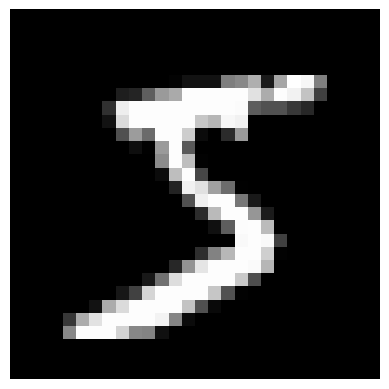

0번째 훈련데이터 정답 : 5


In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(x_train[0], cmap=cm.gray)
plt.axis('off')
plt.show()

print('0번째 훈련데이터 정답 :', y_train[0])

# 머신러닝 모델 빌드

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.19055085, 0.1216677 , 0.08560269, 0.13366705, 0.07725433,
        0.03573426, 0.06968816, 0.09697691, 0.08369301, 0.105165  ]],
      dtype=float32)

In [31]:
tf.nn.softmax(predictions).numpy()

array([[0.10938995, 0.10210849, 0.09849156, 0.10334111, 0.09767275,
        0.0937004 , 0.09693652, 0.09961823, 0.09830365, 0.10043725]],
      dtype=float32)

In [32]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [33]:
loss_fn(y_train[:1], predictions).numpy()

2.367653

In [34]:
model.fit(x_train, y_train, epochs=5) # 기본 batch size는 32 인듯

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2937 - accuracy: 0.9164
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9775


In [35]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0753 - accuracy: 0.9782 - 435ms/epoch - 1ms/step


[0.07526145130395889, 0.9782000184059143]

In [36]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [55]:
np.argmax(probability_model(x_test[:1]))

7

---

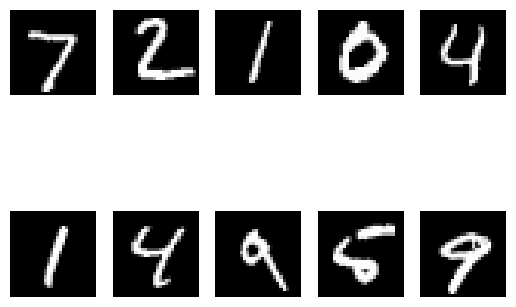

In [43]:
# 테스트데이터셋 10개 눈으로 확인
for i, img in enumerate(x_test[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap=cm.gray)
    plt.axis('off')
plt.show()

In [74]:
# 테스트데이터셋 예측값 확인

import numpy as np

predict_list = [np.argmax(i) for i in probability_model(x_test[:10])]
for label, pred in zip(y_test[:10], predict_list):
    print(label==pred, label, pred)

True 7 7
True 2 2
True 1 1
True 0 0
True 4 4
True 1 1
True 4 4
True 9 9
True 5 5
True 9 9
